# Exploratory Data Analysis

In [2]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Import the dataset

In [6]:
#Load the dataset
df = pd.read_csv('D:\Team Project\data\credit_risk_dataset.csv')

In [7]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Shape of the Dataset

The dataset contains records of 32,581 clients on 12 features (variables)

In [8]:
df.shape

(32581, 12)

## Brief Description of the dataset

This dataset contains various features related to individuals and their loans. The goal is to predict whether a loan will default or not. Below are the features included in the dataset:

| Feature Name | Description |
| --- | --- |
| person_age | Age of the person |
| person_income	| Annual income of the person |
| person_home_ownership | Home ownership status (e.g., rent, own, mortgage) |
| person_emp_length | Employment length in years |
| loan_intent |	Intent of the loan (e.g., education, personal, medical) |
| loan_grade | Grade of the loan |
| loan_amnt | Loan amount |
| loan_int_rate | Interest rate of the loan |
| loan_status | Loan status (0 for non-default, 1 for default) |
| loan_percent_income |	Loan amount as a percentage of income |
| cb_person_default_on_file | Whether the individual has a history of defaulting (Y for yes, N for no) |
| cb_preson_cred_hist_length | Length of the person's credit history in years |

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Basic Descriptive Summary of Numerical Variables

In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Number of Missing Values in Each Column
We have several missing values for the variables 'person_emp_length' and 'loan_int_rate'

In [11]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## Number of Unique Values for Each Variable

In [12]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

# 1. Univariate Analysis

## 1.1 Age

In [13]:
df['person_age'].describe()

count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

We see that approximately 75% of the clients are below 30 years of age while max value of age is 144. It is clear that these values are anomalies which is most likely the result of erroneous data entry. We consider any value of age above 100 to be an anomaly.

In [14]:
# Checking the number of anamalous entries
count = 1
for i in range(len(df['person_age'])):
    if df['person_age'][i]>100:
        print("Anomalous Entry ",count,": ",df['person_age'][i])
        count=count+1

Anomalous Entry  1 :  144
Anomalous Entry  2 :  144
Anomalous Entry  3 :  123
Anomalous Entry  4 :  123
Anomalous Entry  5 :  144


In [17]:
df[df.person_age>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


Since we have a sufficiently large dataset (32,581 entries) so we can afford to lose these numerous anamolous entries in order to maintain data integrity.

In [18]:
# Removing the anamalous entries
df = df[df['person_age']<100]

In [19]:
#Checking the removal of anaomalies
df.shape

(32576, 12)

In [20]:
# Distribution of age after removing anomalies
df['person_age'].describe()

count    32576.000000
mean        27.718044
std          6.204990
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64

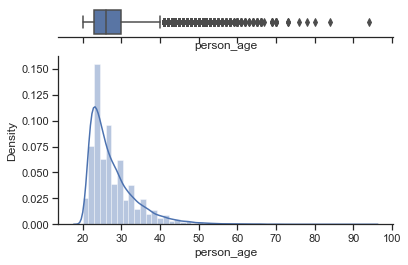

In [21]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['person_age'], ax=ax_box, orient = 'h')
sns.distplot(df['person_age'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

The distribution of age is positively skewed and there is significant presence of outliers.

 ## 1.2 Income

In [22]:
df['person_income'].describe()

count    3.257600e+04
mean     6.588214e+04
std      5.253499e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      2.039784e+06
Name: person_income, dtype: float64

In [28]:
print("Minimum Income: ",df['person_income'].min())
print("Maximum Income: ",df['person_income'].max())
print("Average Income: ",df['person_income'].mean())

Minimum Income:  4000
Maximum Income:  2039784
Average Income:  65882.14126964637


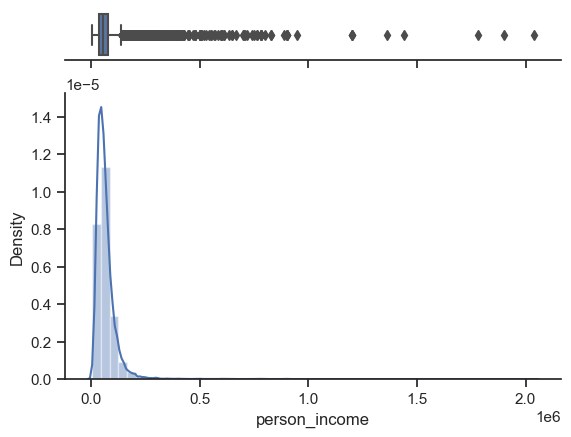

In [17]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['person_income'], ax=ax_box, orient = 'h')
sns.distplot(df['person_income'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

While most of the income are clustered around the mean and median, there are some high outliers as indicated by the boxplot.

 ## 1.3 Person Employment Length

In [18]:
df['person_emp_length'].describe()

count    31681.000000
mean         4.789527
std          4.142706
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

Again we see that max value of a person's employment length is found to be 123 years which is clearly an anomaly.We again consider any value of employment length above 50 to be an anomaly.

In [32]:
# Checking the number of anamalous entries
d = df['person_emp_length']
count = 1
for value in d:
    if value > 50:
        print("Anomalous Entry ", count, ": ", value)
        count += 1

Anomalous Entry  1 :  123.0
Anomalous Entry  2 :  123.0


In [33]:
# Removing the anamalous entries
df = df[df['person_emp_length']<50]

In [34]:
#Checking the removal of anaomalies
df.shape

(31679, 12)

In [35]:
# Distribution of employment length after removing anomalies
df['person_emp_length'].describe()

count    31679.000000
mean         4.782064
std          4.034948
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: person_emp_length, dtype: float64

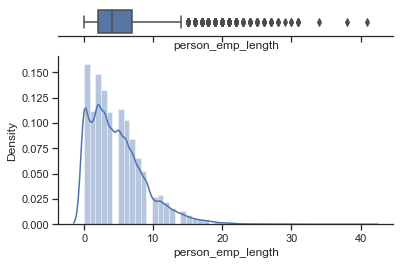

In [36]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['person_emp_length'], ax=ax_box, orient = 'h')
sns.distplot(df['person_emp_length'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

 ## 1.4 Loan Amount

In [37]:
df['loan_amnt'].describe()

count    31679.000000
mean      9659.962436
std       6334.360554
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

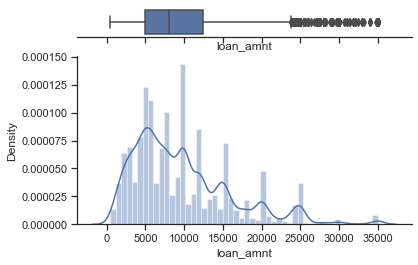

In [38]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['loan_amnt'], ax=ax_box, orient = 'h')
sns.distplot(df['loan_amnt'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

 ## 1.5 Loan Interest Rate

In [39]:
df['loan_int_rate'].describe()

count    28632.000000
mean        11.039701
std          3.229409
min          5.420000
25%          7.900000
50%         10.990000
75%         13.480000
max         23.220000
Name: loan_int_rate, dtype: float64

We from the count of records that some of the entries for loan interest rate are missing. We will deal with these missing values during data cleaning and pre-processing stage.

In [45]:
#Checking for missing values and printing percentage of values that are missing.
na_count=df['loan_int_rate'].isna().sum()
print("No. of missing values in Loan Interest Rate: ",na_count)
print("Percentage of missing values: ",(na_count/len(df))*100)

No. of missing values in Loan Interest Rate:  3047
Percentage of missing values:  9.618359165377695


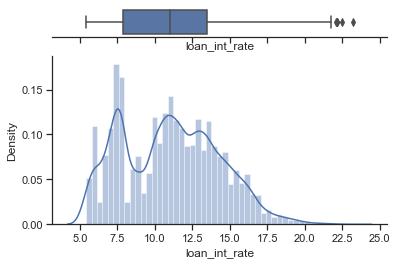

In [46]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['loan_int_rate'], ax=ax_box, orient= 'h' )
sns.distplot(df['loan_int_rate'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

 ## 1.6 Loan Percent Income

In [47]:
df['loan_percent_income'].describe()

count    31679.000000
mean         0.169610
std          0.106269
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

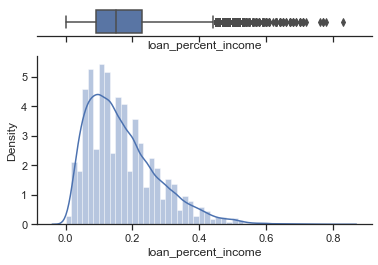

In [48]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['loan_percent_income'], ax=ax_box, orient = 'h')
sns.distplot(df['loan_percent_income'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

 ## 1.7 Person's Credit History Length

In [49]:
df['cb_person_cred_hist_length'].describe()

count    31679.000000
mean         5.809211
std          4.059710
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

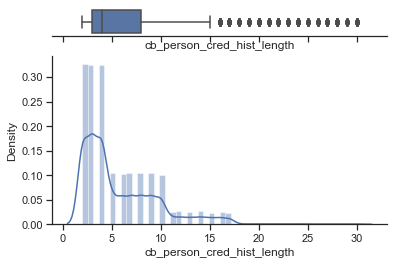

In [50]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['cb_person_cred_hist_length'], ax=ax_box, orient = 'h')
sns.distplot(df['cb_person_cred_hist_length'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In summary, the histogram of all the numerical features are shown below to give quick glimpse about the dataset.

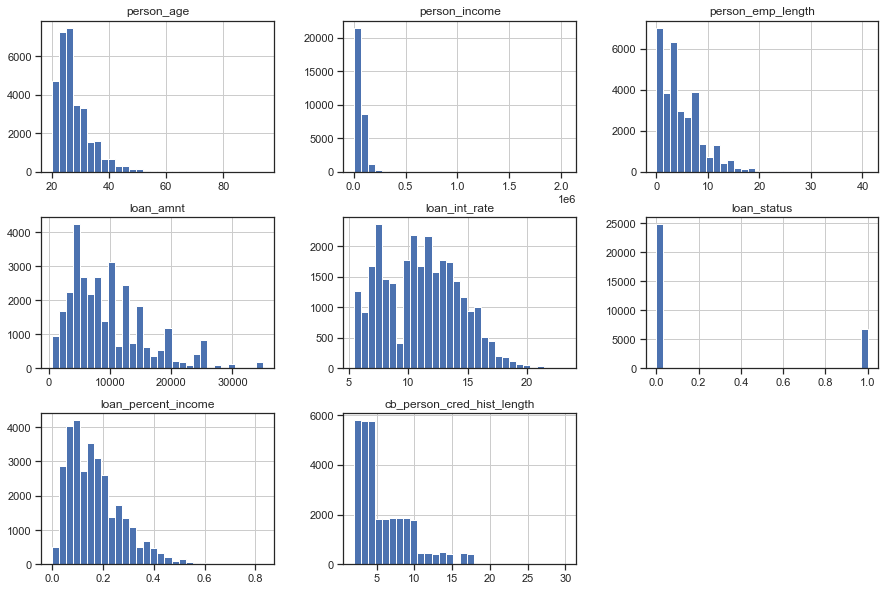

In [91]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

# 2. Categorical Features

## 2.1 Home Ownership

In [52]:
df['person_home_ownership'].describe()

count     31679
unique        4
top        RENT
freq      16072
Name: person_home_ownership, dtype: object

In [62]:
df.groupby('person_home_ownership').size()

person_home_ownership
MORTGAGE    13090
OTHER         107
OWN          2410
RENT        16072
dtype: int64

(-1.108713032259552, 1.101085491979068, -1.110304481272625, 1.1231695801841015)

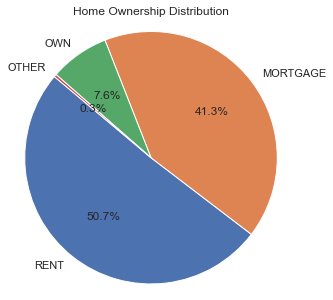

In [65]:
# Count the occurrences of each category
ownership_counts = df['person_home_ownership'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Home Ownership Distribution')
plt.axis('equal')

## 2.2 Loan Intent

In [71]:
df['loan_intent'].describe()

count         31679
unique            6
top       EDUCATION
freq           6288
Name: loan_intent, dtype: object

In [72]:
df.groupby('loan_intent').size()

loan_intent
DEBTCONSOLIDATION    5064
EDUCATION            6288
HOMEIMPROVEMENT      3510
MEDICAL              5897
PERSONAL             5367
VENTURE              5553
dtype: int64

(-1.1142306585962902,
 1.1166108976526772,
 -1.1196094481132683,
 1.1156114520392042)

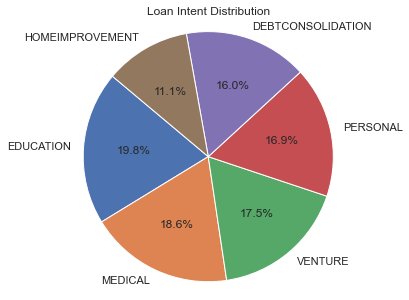

In [73]:
# Count the occurrences of each category
intent_counts = df['loan_intent'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan Intent Distribution')
plt.axis('equal')

## 2.3 Loan Grade

In [74]:
df['loan_grade'].describe()

count     31679
unique        7
top           A
freq      10370
Name: loan_grade, dtype: object

In [76]:
df.groupby('loan_grade').size()

loan_grade
A    10370
B    10183
C     6319
D     3555
E      952
F      236
G       64
dtype: int64

Text(0.5, 1.0, 'Loan Grade Distribution')

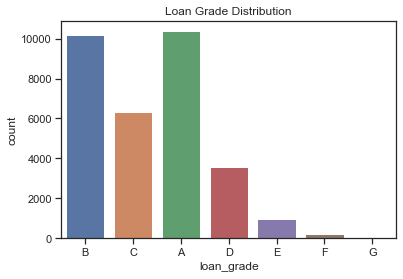

In [80]:
sns.countplot(x='loan_grade', data=df)
plt.title('Loan Grade Distribution')

## 2.4 Loan Status

In [92]:
df['loan_status'].describe()

count    31679.000000
mean         0.215442
std          0.411135
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [93]:
df.groupby('loan_status').size()

loan_status
0    24854
1     6825
dtype: int64

(-1.1055441862563664,
 1.1049515711888434,
 -1.1067545267345418,
 1.1267222728070587)

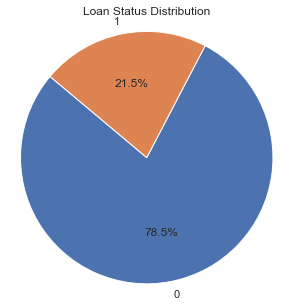

In [94]:
# Count the occurrences of each category
status_counts = df['loan_status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan Status Distribution')
plt.axis('equal')

#### From the Pie Chart we see that our dataset contains 78.5% non-defaulters and 21.5% defaulters. So in terms of target variable loan status the dataset may be considered to be imbalanced.

## 2.5 Historical Credit Default

In [95]:
df['cb_person_default_on_file'].describe()

count     31679
unique        2
top           N
freq      26051
Name: cb_person_default_on_file, dtype: object

In [96]:
df.groupby('cb_person_default_on_file').size()

cb_person_default_on_file
N    26051
Y     5628
dtype: int64

Text(0.5, 1.0, 'Previous Credit Defaulters')

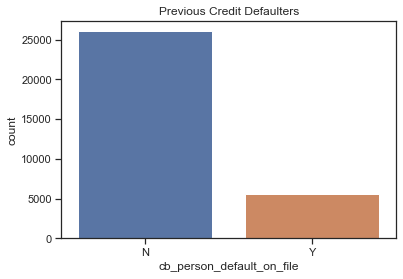

In [98]:
sns.countplot(x='cb_person_default_on_file', data=df)
plt.title('Previous Credit Defaulters')

# 3. Bivariate & Multivariate Analysis

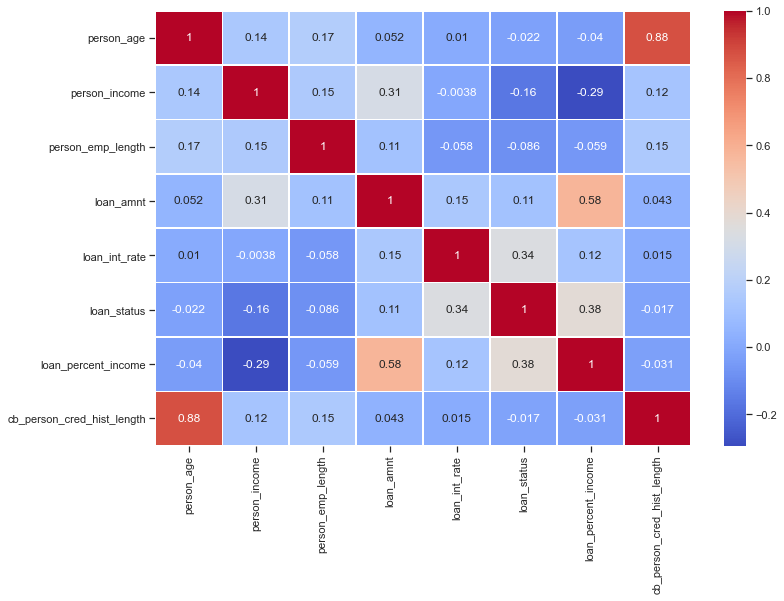

In [102]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

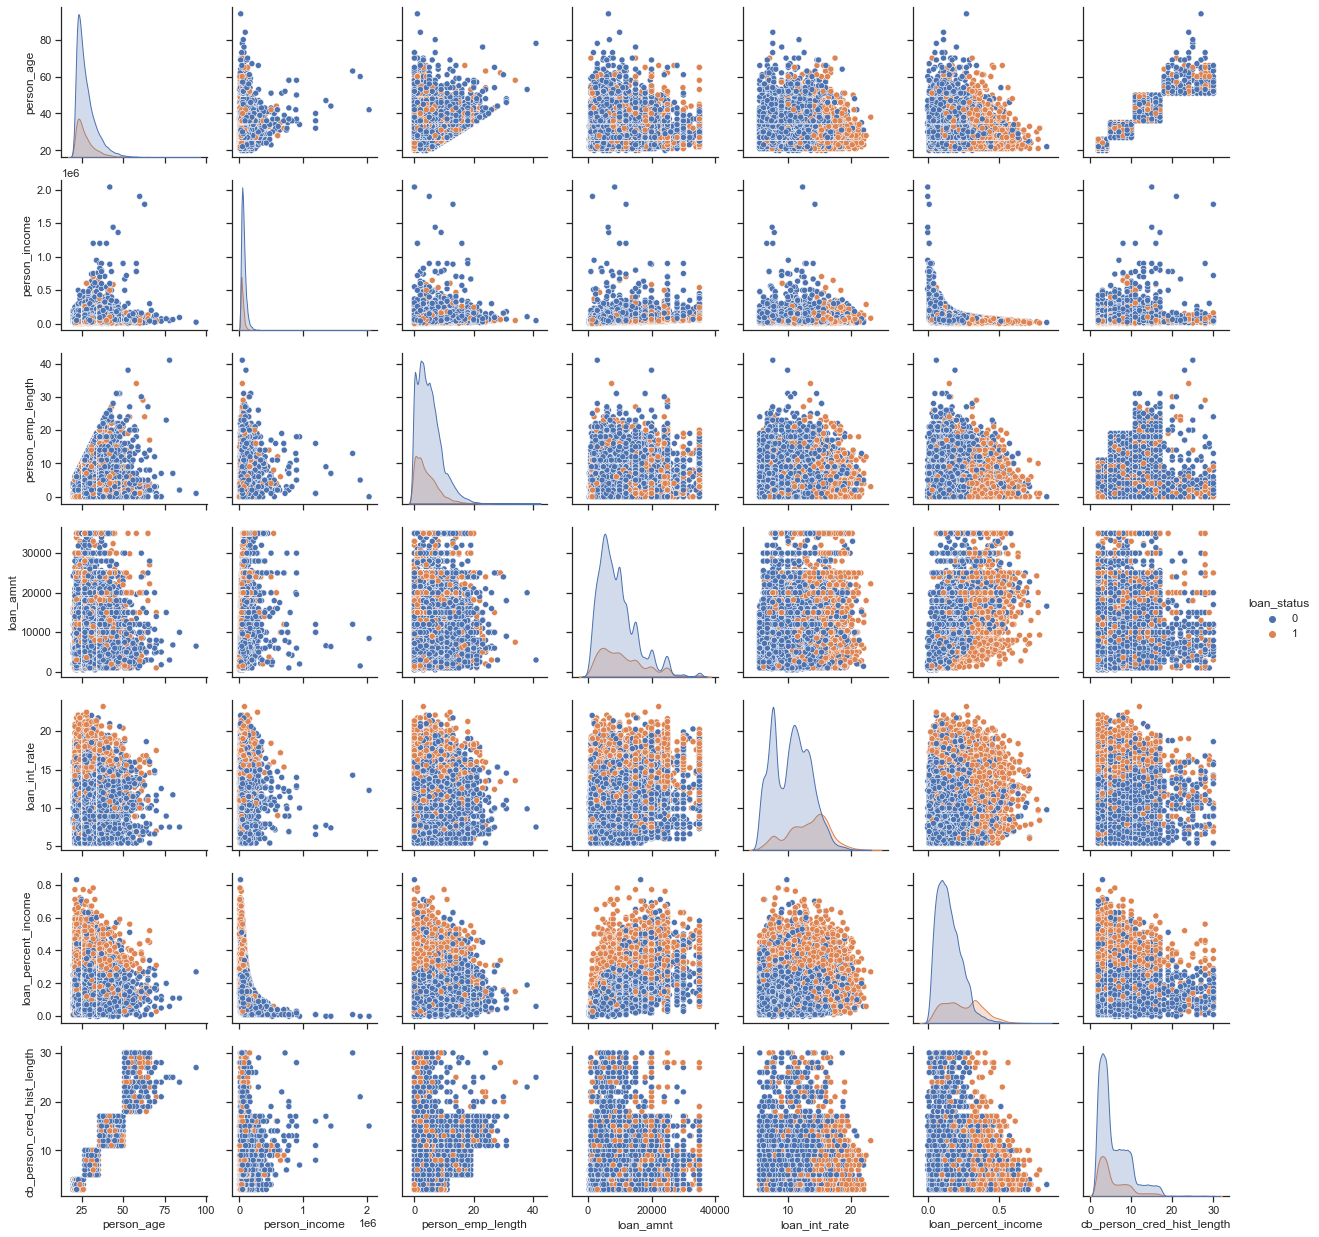

In [103]:
# Pair plots
sns.pairplot(df, hue='loan_status')
plt.show()

# Group By Analysis

## Home Ownership & Age

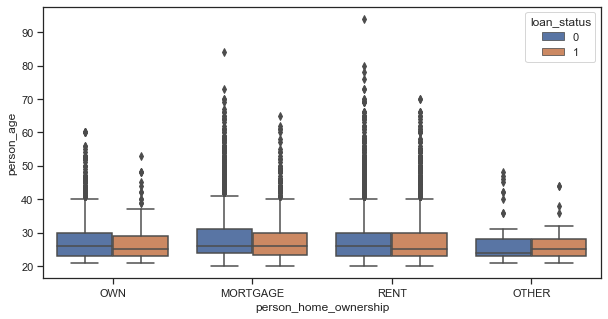

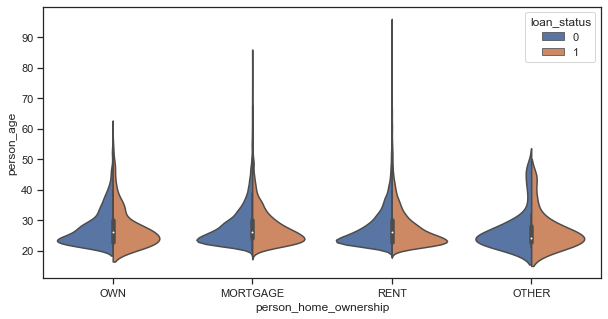

In [138]:
# Box plots and violin plots
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='person_home_ownership', y='person_age', hue='loan_status')
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='person_home_ownership', y='person_age', hue='loan_status', split=True)
plt.show()

## Home Ownership and Loan Amount

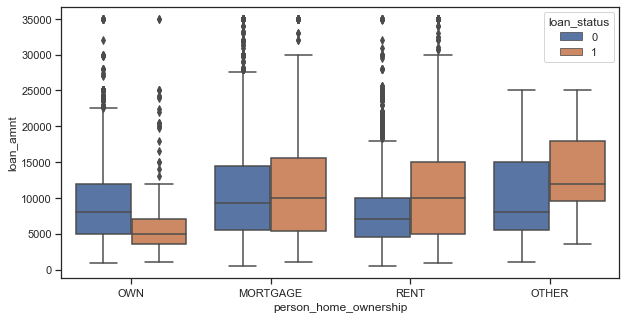

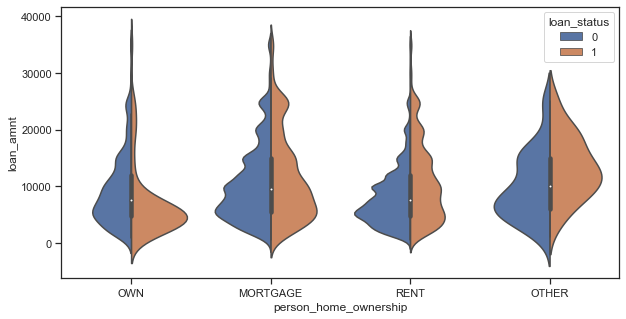

In [131]:
# Box plots and violin plots
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='person_home_ownership', y='loan_amnt', hue='loan_status')
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='person_home_ownership', y='loan_amnt', hue='loan_status', split=True)
plt.show()

## Home Ownership & Loan Interest Rate

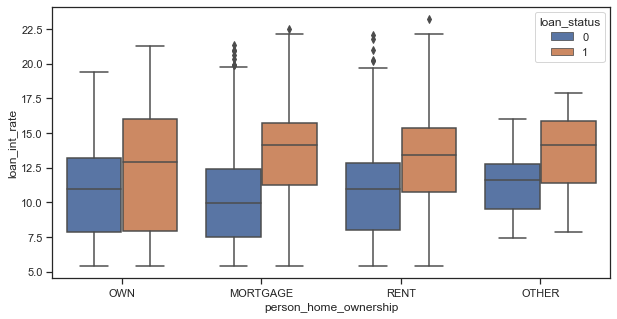

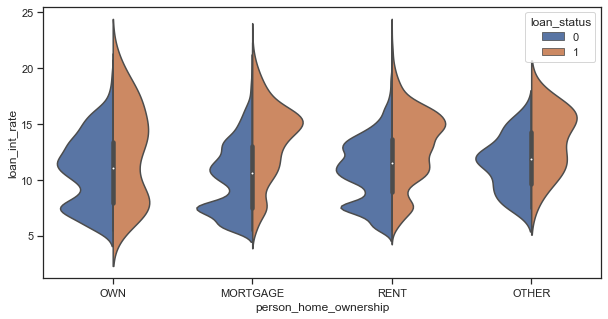

In [130]:
# Box plots and violin plots
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='person_home_ownership', y='loan_int_rate', hue='loan_status')
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='person_home_ownership', y='loan_int_rate', hue='loan_status', split=True)
plt.show()

## Home Ownership and Loan as Percent of Income

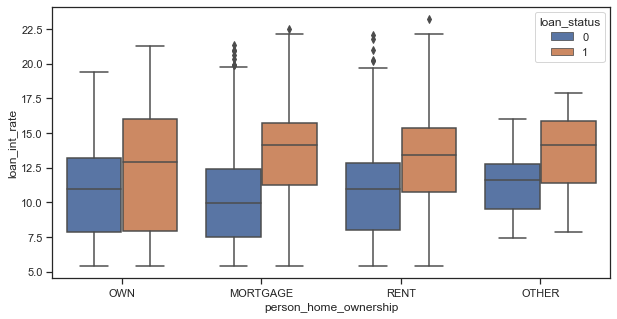

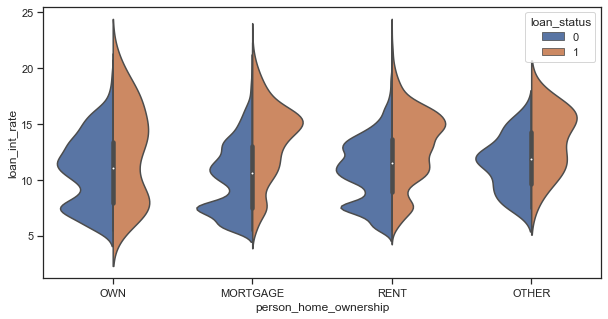

In [128]:
# Box plots and violin plots
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='person_home_ownership', y='loan_int_rate', hue='loan_status')
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='person_home_ownership', y='loan_int_rate', hue='loan_status', split=True)
plt.show()

## Home Ownership & Credit History

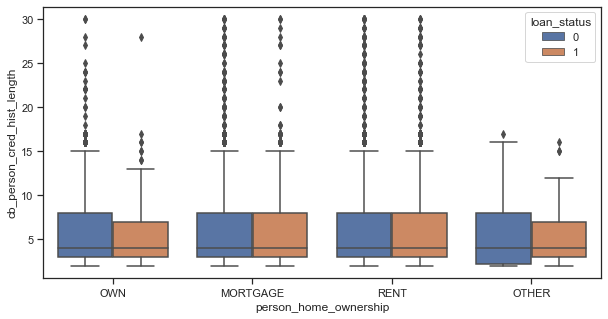

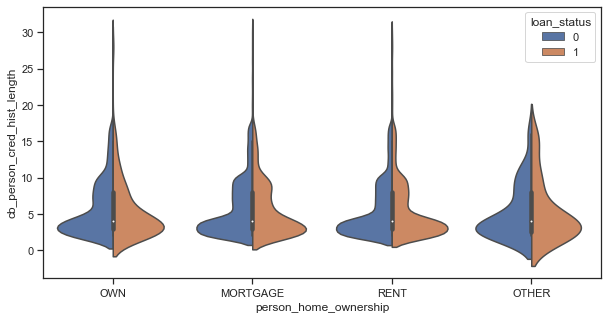

In [139]:
# Box plots and violin plots
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='person_home_ownership', y='cb_person_cred_hist_length', hue='loan_status')
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='person_home_ownership', y='cb_person_cred_hist_length', hue='loan_status', split=True)
plt.show()

## Loan Intent and Income

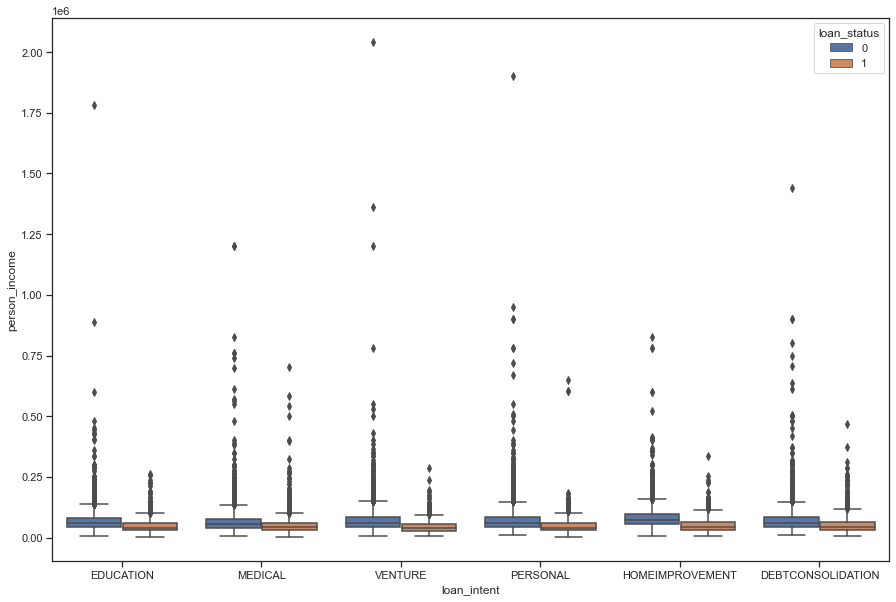

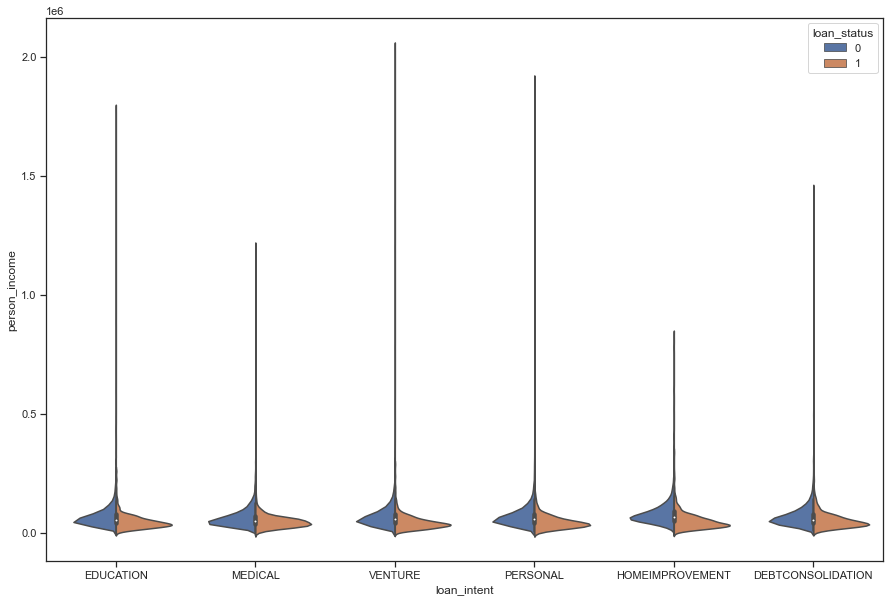

In [118]:
# Box plots and violin plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='loan_intent', y='person_income', hue='loan_status')
plt.show()

plt.figure(figsize=(15, 10))
sns.violinplot(data=df, x='loan_intent', y='person_income', hue='loan_status', split=True)
plt.show()

## Loan Intent & Loan Amount

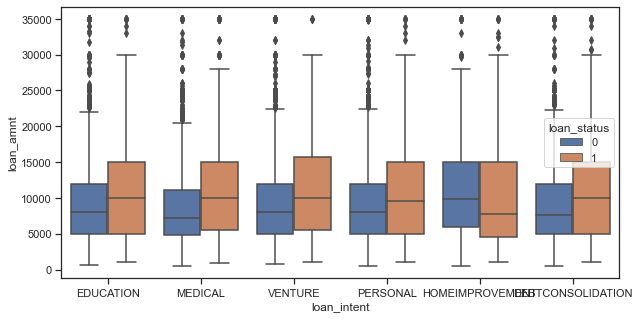

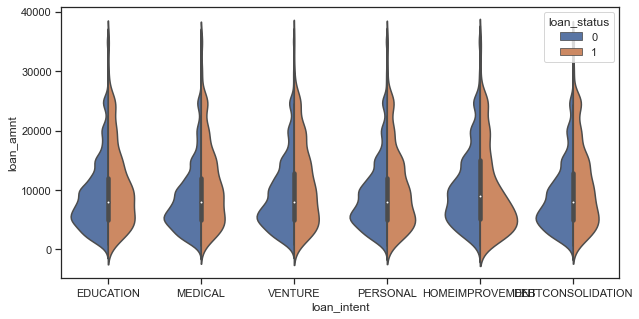

In [126]:
# Box plots and violin plots
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='loan_intent', y='loan_amnt', hue='loan_status')
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='loan_intent', y='loan_amnt', hue='loan_status', split=True)
plt.show()

## Loan Intent & Loan Interest Rate

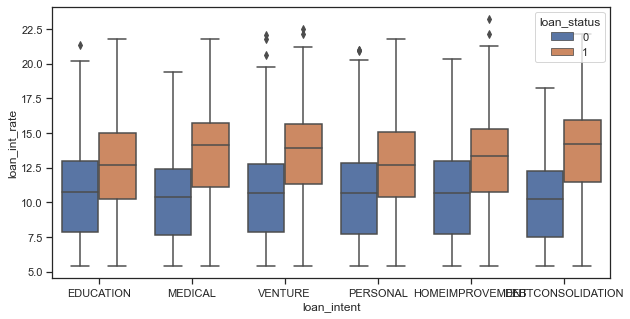

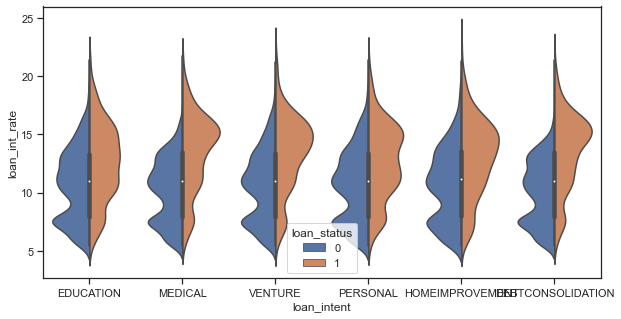

In [125]:
# Box plots and violin plots
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='loan_intent', y='loan_int_rate', hue='loan_status')
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='loan_intent', y='loan_int_rate', hue='loan_status', split=True)
plt.show()

## Loan Intent and Loan as Percent of Income

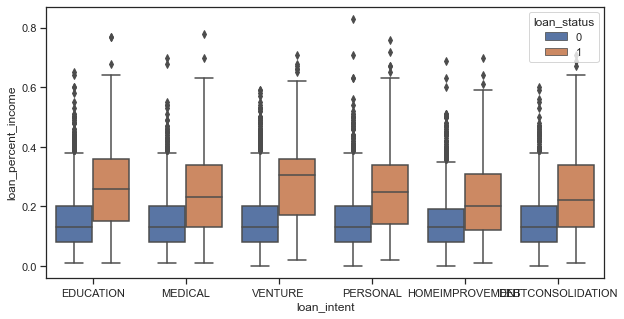

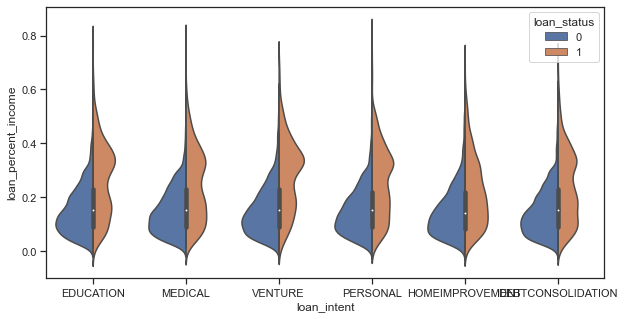

In [123]:
# Box plots and violin plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='loan_intent', y='loan_percent_income', hue='loan_status')
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='loan_intent', y='loan_percent_income', hue='loan_status', split=True)
plt.show()

## Loan Intent & Credit History

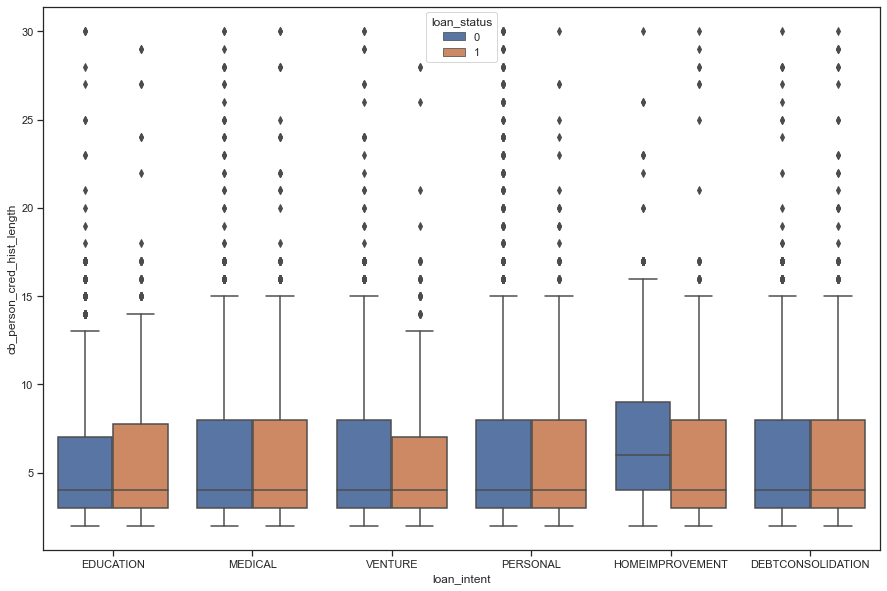

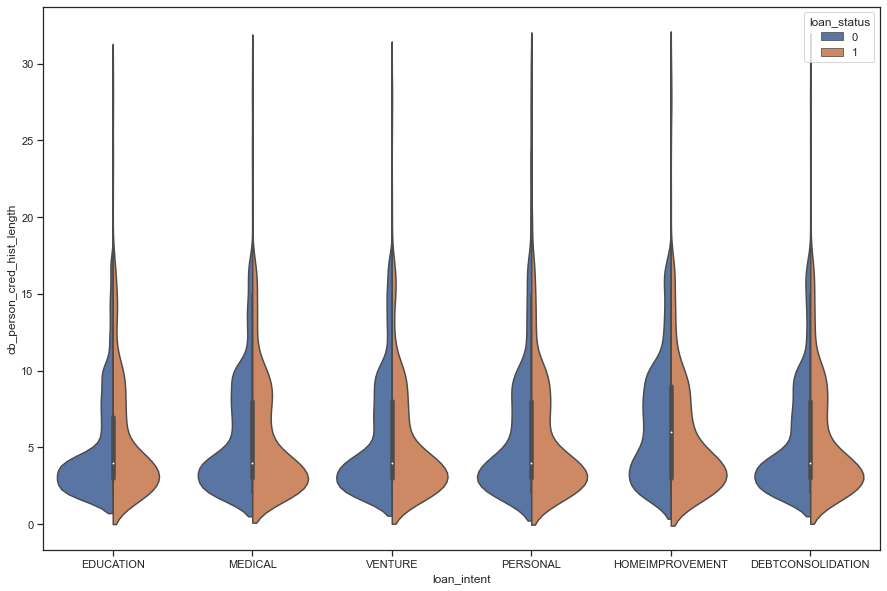

In [135]:
# Box plots and violin plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='loan_intent', y='cb_person_cred_hist_length', hue='loan_status')
plt.show()

plt.figure(figsize=(15, 10))
sns.violinplot(data=df, x='loan_intent', y='cb_person_cred_hist_length', hue='loan_status', split=True)
plt.show()

### Loan Grade and Loan Amount

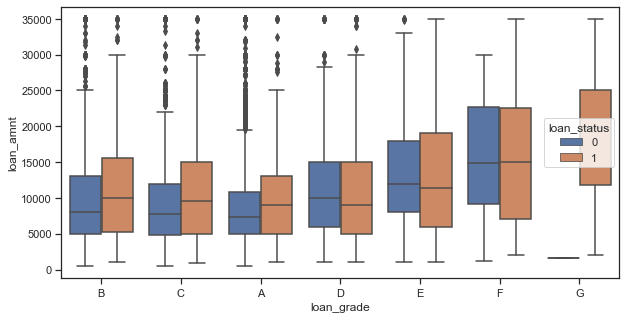

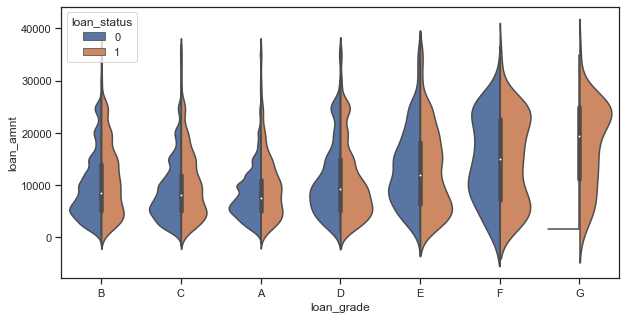

In [136]:
# Box plots and violin plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='loan_grade', y='loan_amnt', hue='loan_status')
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='loan_grade', y='loan_amnt', hue='loan_status', split=True)
plt.show()

## Loan Grade and Loan Interest Rate

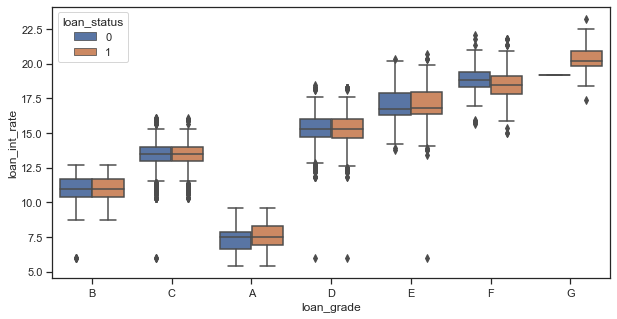

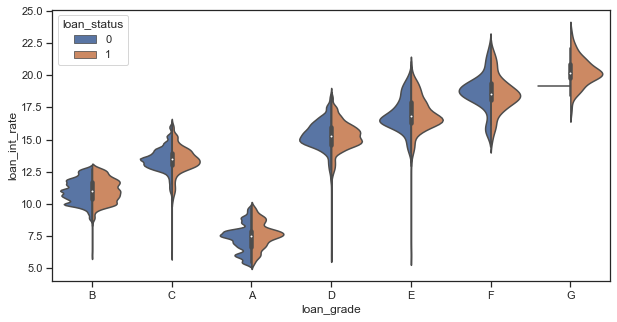

In [137]:
# Box plots and violin plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='loan_grade', y='loan_int_rate', hue='loan_status')
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='loan_grade', y='loan_int_rate', hue='loan_status', split=True)
plt.show()

## Loan Grade and Loan as Percent of Income

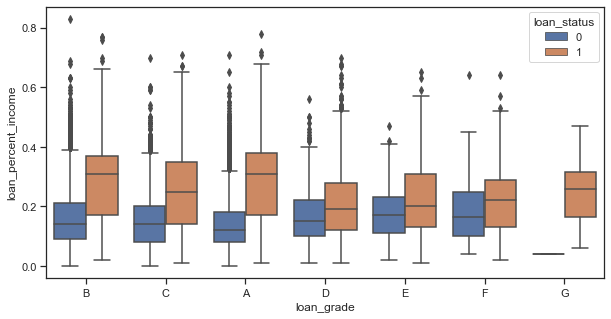

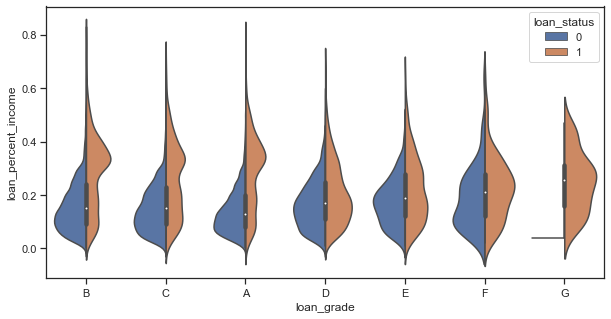

In [142]:
# Box plots and violin plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='loan_grade', y='loan_percent_income', hue='loan_status')
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='loan_grade', y='loan_percent_income', hue='loan_status', split=True)
plt.show()

## Previous Defaulters & Loan Amount

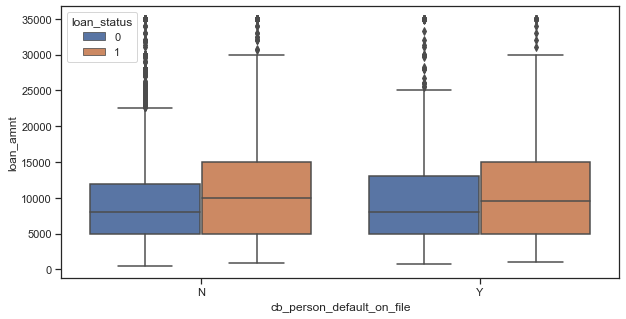

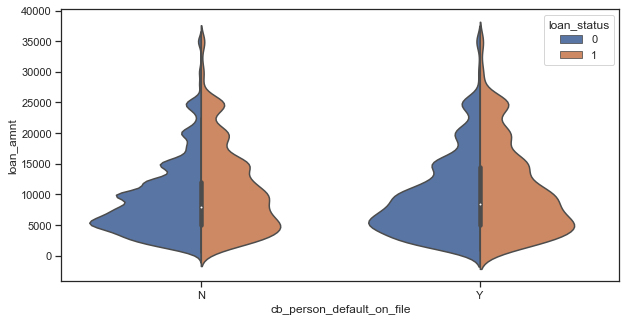

In [145]:
# Box plots and violin plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cb_person_default_on_file', y='loan_amnt', hue='loan_status')
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='cb_person_default_on_file', y='loan_amnt', hue='loan_status', split=True)
plt.show()

## Previous Defaulters & Loan Interest Rate

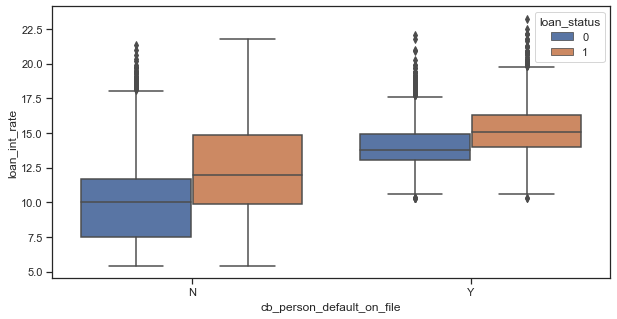

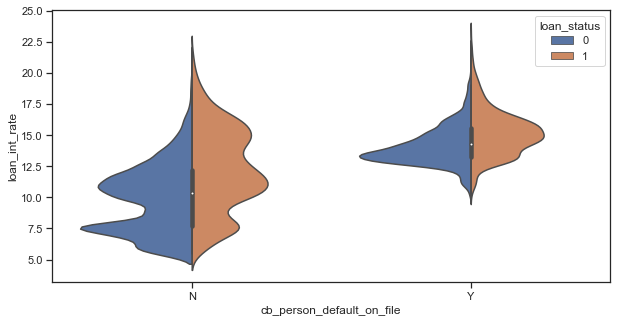

In [146]:
# Box plots and violin plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cb_person_default_on_file', y='loan_int_rate', hue='loan_status')
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='cb_person_default_on_file', y='loan_int_rate', hue='loan_status', split=True)
plt.show()

## Previous Defaulters & Loan as Percent of Income

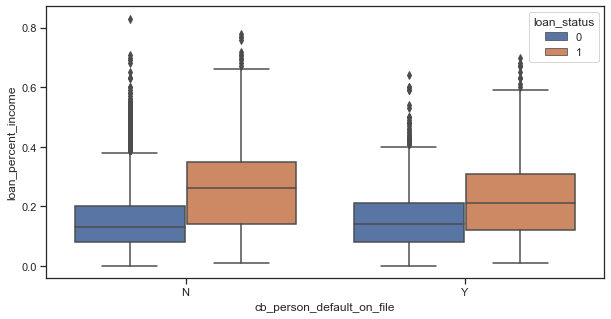

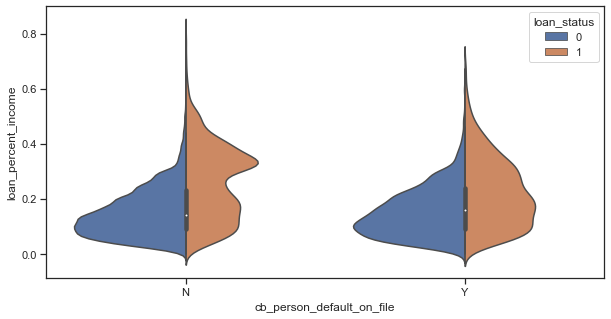

In [147]:
# Box plots and violin plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cb_person_default_on_file', y='loan_percent_income', hue='loan_status')
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='cb_person_default_on_file', y='loan_percent_income', hue='loan_status', split=True)
plt.show()

In [148]:
#Exporting the final dataset
df.to_csv('credit_risk_explored.csv')